# Employee Mental Health

Berangkat dari fenomena hustle dari silicon valley yang sudah cukup lama menjadi trend, dimana karyawan dihadapi dengan keadaan harus bekerja dari pagi sampai larut malam sehingga jam tidur/istirahat sangat minim, ber-impact pada munculnya masalah mental health di kalangan karyawan. Hal ini tentunya akan mempengaruhi performance dan produktivitas karyawan.

Berikut struktur dataset yang bersumber dari Kaggle dari survey tahun 2014
https://www.kaggle.com/code/aditimulye/mental-health-at-workplace/data
Responden : karyawan yang sedang mengalami mental health disorder yang terdiagnosis secara medical atau pun hanya dari perasaan

Columns & Desc

1	Timestamp - Time the survey was submitted

2	Age - Respondent age

3	Gender - Respondent gender

4	Country - Respondent country

5	state - If you live in the United States, which state or territory do you live in?

6	self_employed - Are you self-employed?

7	family_history - Do you have a family history of mental illness?

8	treatment - Have you sought treatment for a mental health condition?

9	work_interfere - If you have a mental health condition, do you feel that it interferes with your work?

10	no_employees - How many employees does your company or organization have?

11	remote_work - Do you work remotely (outside of an office) at least 50% of the time?

12	tech_company - Is your employer primarily a tech company/organization?

13	benefits - Does your employer provide mental health benefits?

14	care_options - Do you know the options for mental health care your employer provides?

15	wellness_program - Has your employer ever discussed mental health as part of an employee wellness program?

16	seek_help - Does your employer provide resources to learn more about mental health issues and how to seek help?

17	anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

18	leave - How easy is it for you to take medical leave for a mental health condition?

19	mental_health_consequence - Do you think that discussing a mental health issue with your employer would have negative consequences?

20	phys_health_consequence - Do you think that discussing a physical health issue with your employer would have negative consequences?

21	coworkers - Would you be willing to discuss a mental health issue with your coworkers?

22	supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?

23	mental_health_interview - Would you bring up a mental health issue with a potential employer in an interview?

24	phys_health_interview - Would you bring up a physical health issue with a potential employer in an interview?

25	mental_vs_physical - Do you feel that your employer takes mental health as seriously as physical health?

26	obs_consequence - Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

27	comments - Any additional notes or comments



Disini kita akan mencari apa saja kah faktor yang dapat mempengaruhi kayawan untuk mendapatkan treatment. Atas faktor yang didapatkan tersebut, dapat kita rekomendasikan ke HR untuk dapat disupportdan merencanakan upaya preventif.Diharapkan setelahnya dapat membuat karyawan lebih sehat bukan hanya secara fisik tetapi juga  mental untuk mendorong tingkat performance, produktivitas karyawan, dan juga membuat karyawan merasa diperhatikan agar lebih engage terhadap perusahaan. Harvard Business Review mengatakan bahwa karyawan yang merasa perusahaan menghargai masalah kesehatan mental, akan memiliki tingkat produktivitas yang tinggi dan tingkat ketidakhadiran yang lebih rendah. 

## 1. Cleansing Data

In [266]:
#import library yang diperlukan
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [267]:
#import data dan show data head 
df = pd.read_csv("C:/Users/Pavilion 14/Documents/Dibim Course/Final Project/survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [268]:
#melihat summary tipe data per kolom dan jumlah row per kolom yang non-null
df.info()

#didapatkan bahwa mayoritas data bertipe object dan yg bertipe integer yaitu hanya 1 yakni Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [269]:
#Cek demografi reponden darimana saja dan umurnya berapa saja
print(df['Country'].value_counts())
print("\n \n")
print(df['Age'].value_counts())

#didapatkan bahwa data terdiri dari banyak negara di seluruh belahan dunia.
#terdapat temuan untuk usia angkanya tidak logis yaitu bernilai minus dan ada yang lebih dari 100 tahun

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [270]:
#Cek isi dari tiap kolom yang tersisa apakah masih ada kategori yang belum standard (menggunakan iterasi)

for column in df[['Gender','self_employed', 'family_history','treatment','work_interfere','no_employees','remote_work','tech_company','benefits','care_options','wellness_program','seek_help','anonymity','leave','mental_health_consequence','phys_health_consequence','coworkers','supervisor','mental_health_interview','phys_health_interview','mental_vs_physical','obs_consequence']]:
   columnSeriesObj = df[column].unique()
   print('\n \n Column Contents of',column,': ', columnSeriesObj)
    
    
#didapatkan bahwa perlunya standardisasi untuk kolom gender 
#dan meremind kembali temuan sebelumnya di atas bahwa kolom age juga tidak logis 


 
 Column Contents of Gender :  ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']

 
 Column Contents of self_employed :  [nan 'Yes' 'No']

 
 Column Contents of family_history :  ['No' 'Yes']

 
 Column Contents of treatment :  ['Yes' 'No']

 
 Column Contents of work_interfere :  ['Often' 'Rarely' 'Never' 'Sometimes' nan]

 
 Column Contents of no_employees :  ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

 
 Column Contents of remote_work :  ['No' 'Yes']

 
 Column Co

In [271]:
#Membersihkan isi dari kolom yang kategorinya atau nilainya belum sesuai : Gender & Age

In [272]:
#Gender -> untuk yang di luar kategori female & male akan dibuat menjadi other
df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()

Male      991
Female    247
Other      21
Name: Gender, dtype: int64

In [273]:
#Age -> drop row yang kolom Age >100 dan <18 (ada 3 orang yg di bawah 18 tahun dan >0) 
df.drop(df[df['Age'] < 18].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

## 2. EDA

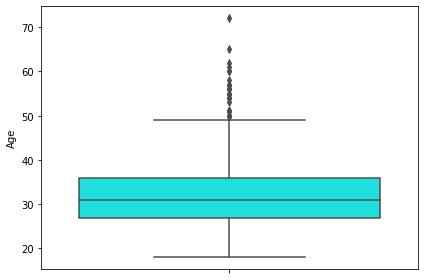

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

#Univariate Analysis
#kolom bertipe numeric hanya 1 yaitu Age
sns.boxplot(y='Age', color='cyan',data=df)
plt.tight_layout()

#Insight
#1. Didapatkan data responden dimana yang sedang mengalami mental disorder memusat di usia produktif yaitu sekitar 27-37 tahun
#2. terdapat responden yang berusia sekitar 70 tahun (maks outlier)

<AxesSubplot:xlabel='Age', ylabel='Density'>

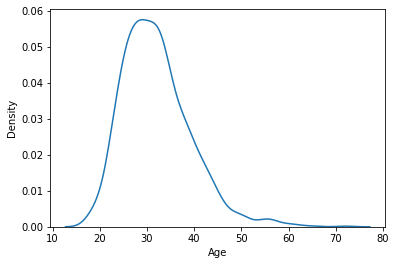

In [275]:
#Bentuk lain distribusi Age menggunakan kdeplot
sns.kdeplot(data=df, x="Age")

<AxesSubplot:xlabel='treatment', ylabel='count'>

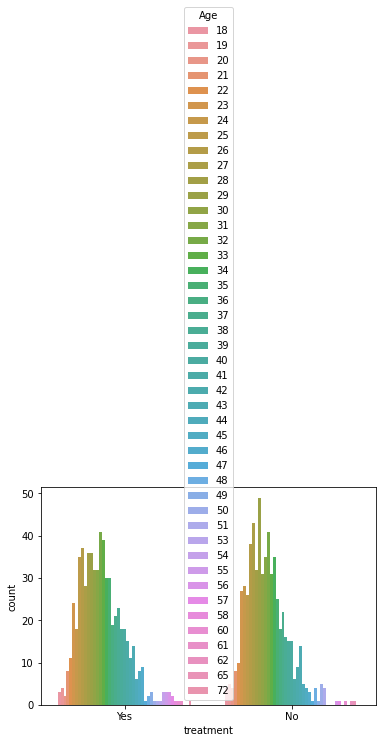

In [276]:
#Karena hampir semua kolom berbentuk kategorikal, maka kita lanjut dengan Bivariate Analysis

# Apakah 'Age' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='Age')

#didapatkan bahwa semakin matangnya usia, maka frekuensi responden yang aware untuk melakukan treatment semakin banyak
#terlihat dari kategori yes pada treatment usia yang lebih tua frekuensinya lebih banyak dibandingkan kategori no pada treatment
#dan juga terlihat dari pusat data berwarna coklat pada kategori no, akan tetapi pada kateori yes memusat di warna hijau dimana usia lebih tua dibanding coklat 

<AxesSubplot:xlabel='treatment', ylabel='count'>

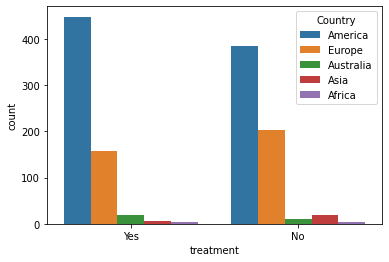

In [277]:
# Apakah 'State' mempengaruhi 'treatment' (kolom target)?

#kelompokkan terlebih dahulu berdasarkan nama Benua
df['Country'].replace(['Zimbabwe','Nigeria','South Africa',], 'Africa', inplace = True)
df['Country'].replace(['Costa Rica','Mexico','Colombia','Uruguay','Brazil','Georgia','Canada','Bahamas, The','United States',], 'America', inplace = True)
df['Country'].replace(['Japan','China','Thailand','Philippines','Singapore','Israel','India',], 'Asia', inplace = True)
df['Country'].replace(['New Zealand','Australia',], 'Australia', inplace = True)
df['Country'].replace(['Denmark','Greece','Czech Republic','Croatia','Norway','Italy','Spain','Romania','Latvia','Hungary','Portugal','Moldova','Belgium','Poland','Bulgaria','Bosnia and Herzegovina','France','Ireland','Sweden','Austria','Germany','Switzerland','Slovenia','Finland','Russia','Netherlands','United Kingdom',], 'Europe', inplace = True)

#Buat grafik Country terhadap awareness treatment :
sns.countplot(data=df,
            x='treatment',
            hue='Country')

#didapatkan bahwa benua yang awareness treatmentnya lebih tinggi yaitu America & Australia.
#sementara, benua Europe dan Asia tngkat awareness treatmentnya lebih rendah
#sedangkan untuk benua Afrika fifty fifty

#oleh karena karakteristik yang berbeda ini, maka tidak dapat disamaratakan tiap benua sehingga kolom Country ini sebaiknya tidak dibuang dan dilakukan Frequency Encoding

<AxesSubplot:xlabel='treatment', ylabel='count'>

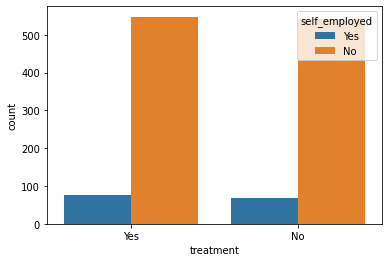

In [278]:
# Apakah 'self_employed' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='self_employed')

#didapatkan hasil yg setara tingkat awareness treatmentnya
#jumlah self employed lebih sedikit dari yg bekerja di perusahaan

<AxesSubplot:xlabel='treatment', ylabel='count'>

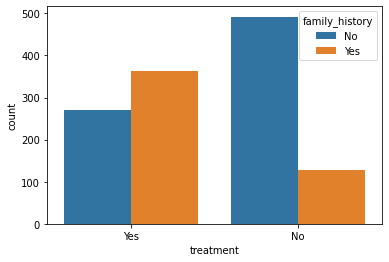

In [279]:
# Apakah 'self_employed' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='family_history')

#didapatkan kebanyakan yg aware terhadap treatment adalah pekerja yang memiliki riwayat keluarga yang pernah terkenal mental illness

<AxesSubplot:xlabel='treatment', ylabel='count'>

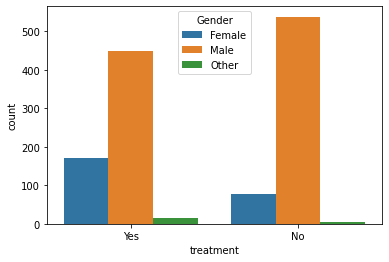

In [280]:
# Apakah 'Gender' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='Gender')

#didapatkan bahwa wanita dan others cenderung lebih memperhatikan treatment dibandingkan laki-laki

<AxesSubplot:xlabel='treatment', ylabel='count'>

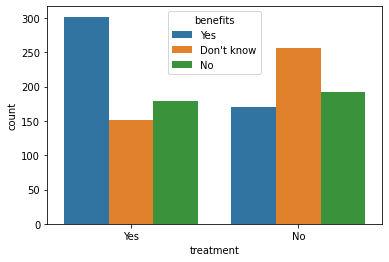

In [281]:
# Apakah 'benefit' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='benefits')

#Semakin tinggi tingkat benefit maka pekerja semakin aware dengan treatment

<AxesSubplot:xlabel='treatment', ylabel='count'>

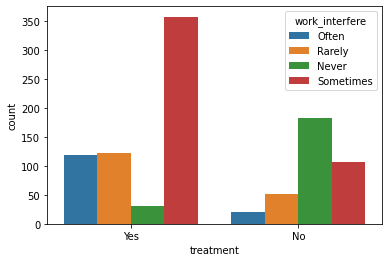

In [282]:
# Apakah 'work_interfere' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='work_interfere')

#pekerja yang merasa tidak terganggunya pekerjaan cenderung untuk tidak melakukan treatment

<AxesSubplot:xlabel='treatment', ylabel='count'>

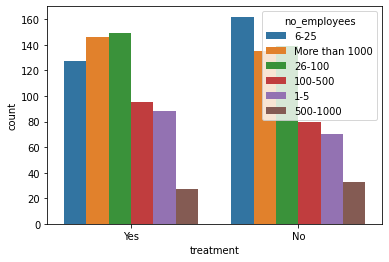

In [283]:
# Apakah 'no_employees' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='no_employees')

#didapatkan semakin besar perusahaan tidak menjamin tingkat treatmet lebih tinggi. Ditunjukkan dengan perusahaan yg memiliki karyawan cukup banyak 500-1000 (berwarna coklat)

<AxesSubplot:xlabel='treatment', ylabel='count'>

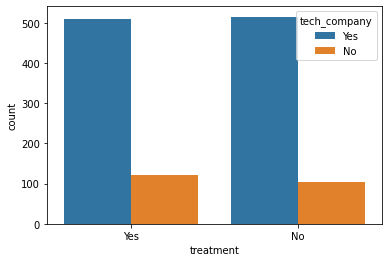

In [285]:
# Apakah 'tech_company' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='tech_company')

#mayoritas respnden berasal dari tech company
#preferensi treatment cenderung sama

<AxesSubplot:xlabel='treatment', ylabel='count'>

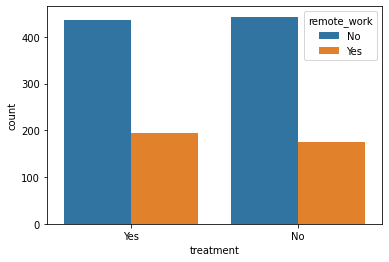

In [286]:
# Apakah 'remote_work' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='remote_work')

#mayoritas respnden yang mengalami terganggnya mental health adalah yang work from office
#preferensi treatment cenderung sama

<AxesSubplot:xlabel='treatment', ylabel='count'>

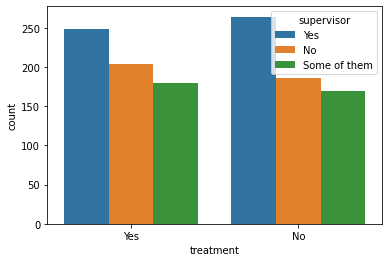

In [287]:
# Apakah 'supervisor' mempengaruhi 'treatment' (kolom target)?
sns.countplot(data=df,
            x='treatment',
            hue='supervisor')

#Mayoritas responden telah berkomunikasi kepada supervisornya terkait mental health

## 3. Data Preparation

In [226]:
#Drop kolom yang tidak akan digunakan untuk modelling
#1. Timestamp -> waktu detail pengambilan survey asumsinya tidak mempengaruhi tingkat mental health seseorang
#2. State -> asumsinya dilakukan random sampling dan level mental health tiap country atau state sama
#3. Comments -> hanya berupa informasi tambahan jika diperlukan

df.drop(columns=['Timestamp', 'state', 'comments'], inplace = True)

In [227]:
#Cek null values
sum_missing_value_df = pd.DataFrame({'Number_of_MissingValue': df.isnull().sum()})

sum_missing_value_df

#Didapatkan ada null value pada Self Employed dan Work Interfere

,Number_of_MissingValue
Age,0
Gender,0
Country,0
self_employed,18
family_history,0
treatment,0
work_interfere,262
no_employees,0
remote_work,0
tech_company,0


In [228]:
#Melihat persentse null value pada data

percent_of_MissingValue = df.isnull().sum() * 100 / len(df)
percentage_missing_value_df = pd.DataFrame({'percent_missing': percent_of_MissingValue})
percentage_missing_value_df

#Kolom self_employed : 1,43% (relatif kecil) & kolom work_interfere : 20,97% (relatif cukup besar) 

,percent_missing
Age,0.000000
Gender,0.000000
Country,0.000000
self_employed,1.438849
family_history,0.000000
treatment,0.000000
work_interfere,20.943245
no_employees,0.000000
remote_work,0.000000
tech_company,0.000000


In [229]:
#Kolom self_employed : 1,43% (relatif kecil) & kolom work_interfere : 20,97% (relatif cukup besar) 
#Null pada kolom self_employed -> dijadikan kategori mengikuti yang banyak muncul yaitu "No" (karena jumlah null relatif kecil dan hanya ada 2 kategori pada kolom tsb)
#Null pada kolom work_interfere -> dibuatkan kategori baru yaitu "Don't Know" (karena jumlah null relatif cukup besar)

df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())

df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]
['No' 'Yes']


In [230]:
# Cek bahwa sudah tidak ada null value
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [231]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [232]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [233]:
#Frequency Encoding kolom Country

freq_et = df['Country'].value_counts().reset_index()
freq_et.rename(columns={"index": "Country", "Country": "freq_Country"}, inplace = True)
freq_et['pct_Country'] = round((freq_et['freq_Country']/freq_et['freq_Country'].sum())*100,2)

df = df.merge(freq_et[['Country','pct_Country']], on='Country', how='inner')

#drop kolom Country karena telah digantikan dengan pct_Country
df.drop(columns=['Country'], inplace = True)

In [234]:
#Frequency Encoding kolom work_interfere

freq_et = df['work_interfere'].value_counts().reset_index()
freq_et.rename(columns={"index": "work_interfere", "work_interfere": "freq_work_interfere"}, inplace = True)
freq_et['pct_work_interfere'] = round((freq_et['freq_work_interfere']/freq_et['freq_work_interfere'].sum())*100,2)

df = df.merge(freq_et[['work_interfere','pct_work_interfere']], on='work_interfere', how='inner')

#drop kolom work_interfere karena telah digantikan dengan pct_work_interfere
df.drop(columns=['work_interfere'], inplace = True)

In [235]:
#Frequency Encoding kolom no_employees

freq_et = df['no_employees'].value_counts().reset_index()
freq_et.rename(columns={"index": "no_employees", "no_employees": "freq_no_employees"}, inplace = True)
freq_et['pct_no_employees'] = round((freq_et['freq_no_employees']/freq_et['freq_no_employees'].sum())*100,2)

df = df.merge(freq_et[['no_employees','pct_no_employees']], on='no_employees', how='inner')

#drop kolom no_employees karena telah digantikan dengan pct_no_employees
df.drop(columns=['no_employees'], inplace = True)

In [236]:
#Frequency Encoding kolom leave

freq_et = df['leave'].value_counts().reset_index()
freq_et.rename(columns={"index": "leave", "leave": "freq_leave"}, inplace = True)
freq_et['pct_leave'] = round((freq_et['freq_leave']/freq_et['freq_leave'].sum())*100,2)

df = df.merge(freq_et[['leave','pct_leave']], on='leave', how='inner')

#drop kolom leave karena telah digantikan dengan pct_leave
df.drop(columns=['leave'], inplace = True)

In [237]:
df.columns

Index(['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'pct_Country',
       'pct_work_interfere', 'pct_no_employees', 'pct_leave'],
      dtype='object')

In [238]:
#Cek hasil Encoding

list_col=['pct_Country','pct_work_interfere','pct_no_employees','pct_leave','Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

PCT_COUNTRY :[66.51 28.78  2.32  1.84  0.56] 
PCT_WORK_INTERFERE :[11.19 13.83 16.95 37.09 20.94] 
PCT_NO_EMPLOYEES :[23.1  23.02 12.63 22.46 13.99  4.8 ] 
PCT_LEAVE :[21.18  7.75  9.99 44.84 16.23] 
AGE :[37 30 25 36 29 31 35 27 28 34 42 22 32 21 26 33 23 43 39 19 24 48 40 38
 18 41 50 60 55 58 46 56 20 49 72 45 61 47 44 57 51 53 54 62 65] 
GENDER :[0 1 2] 
SELF_EMPLOYED :[0 1] 
FAMILY_HISTORY :[0 1] 
TREATMENT :[1 0] 
REMOTE_WORK :[0 1] 
TECH_COMPANY :[1 0] 
BENEFITS :[2 0 1] 
CARE_OPTIONS :[1 0 2] 
WELLNESS_PROGRAM :[1 0 2] 
SEEK_HELP :[2 0 1] 
ANONYMITY :[2 0 1] 
MENTAL_HEALTH_CONSEQUENCE :[1 0 2] 
PHYS_HEALTH_CONSEQUENCE :[1 0 2] 
COWORKERS :[1 2 0] 
SUPERVISOR :[2 0 1] 
MENTAL_HEALTH_INTERVIEW :[1 0 2] 
PHYS_HEALTH_INTERVIEW :[0 1 2] 
MENTAL_VS_PHYSICAL :[2 0 1] 
OBS_CONSEQUENCE :[0 1] 


## 4. Modelling

In [239]:
#Melihat komposisi label dari kolom target
df['treatment'].value_counts()

#didapatkan bahwa data cukup balaced dengan jumlah data 633 untuk data yang berlabel 1, dan 621 untuk data berlabel yang 0
#sehingga tidak perlu melakukan undersampling atau oversampling

1    632
0    619
Name: treatment, dtype: int64

<AxesSubplot:>

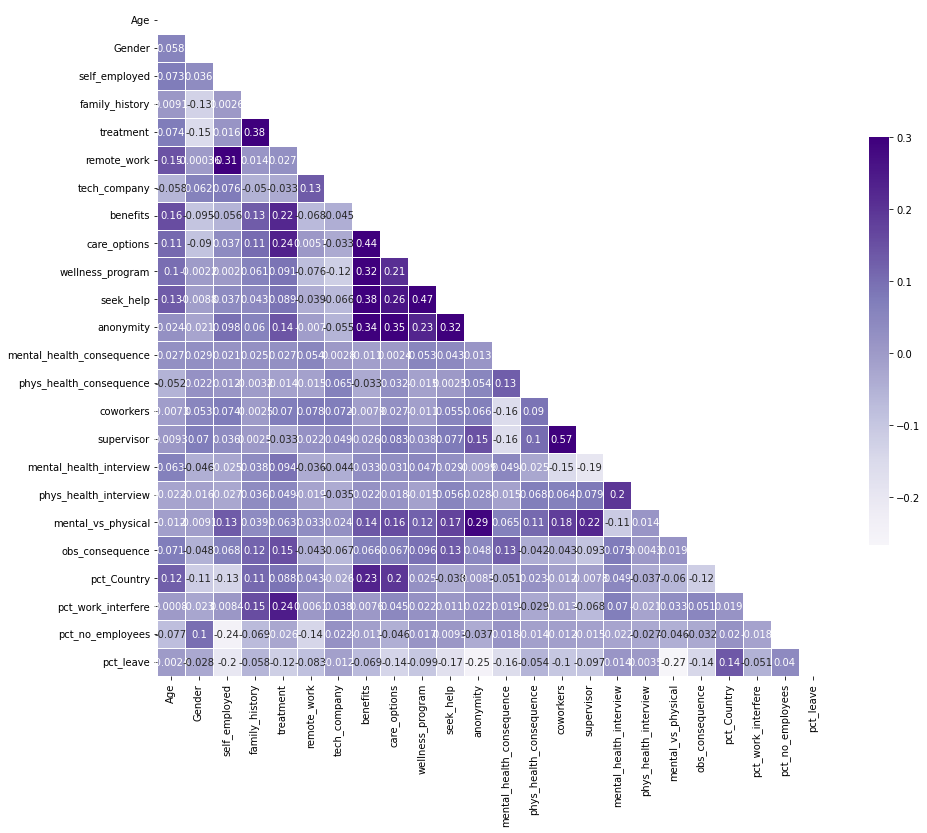

In [240]:
# Menghitung matriks korelasi
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

#didapatkan bahwa antar fitur tidak ada yg berkorelasi tinggi >80 (jika ada harus ditake out salah satunya untuk menghindari multiko)
#korelasi fitur terhadap variabel target pun tidak besar mengindisikan mungkin tidak dapat dilakukan dengan model sederhana (contoh regresi), akan tetapi dengan model yang lebih kompeks


In [241]:
#pip install xgboost

In [242]:
#Pembentukan model

#import library terlebih dahulu
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics


In [243]:
#Mengelompokkan data target (y) dan bukan target alias fitur (X) untuk data train (70%) dan data test (30%)
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [244]:
from sklearn.model_selection import train_test_split
X = df.drop('treatment', axis = 1)
y = df['treatment']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 101)

In [245]:
#Membuat dictionary terlebih dahulu untuk menghasilkan beberapa model sekaligus
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]

models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, n_est

In [246]:
from sklearn.metrics import classification_report

predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)
    # classification report
    print(classification_report(y_test, predict))

LogisticRegression 0.7047872340425532
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       186
           1       0.71      0.69      0.70       190

    accuracy                           0.70       376
   macro avg       0.70      0.70      0.70       376
weighted avg       0.71      0.70      0.70       376

KNeighborsClassifier 0.6835106382978723
              precision    recall  f1-score   support

           0       0.64      0.83      0.72       186
           1       0.76      0.54      0.63       190

    accuracy                           0.68       376
   macro avg       0.70      0.69      0.68       376
weighted avg       0.70      0.68      0.68       376

DecisionTreeClassifier 0.7686170212765957
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       186
           1       0.77      0.77      0.77       190

    accuracy                           0.77       376
   macro

Dari beberapa jenis model yang diujikan, didapatkan hasil paling baik yaitu :
dari metode AdaBoostClassifier dengan akurasi sebesar 0.83
dan f1-score di 0.84
